# Analysis on New York, NY Data.
PM 2.5 Sample Measurements. Scatter Plot displaying annual results. IQR Results. Box plot with outliers.

In [1]:
%matplotlib inline

In [83]:
# Dependencies and Setup
import matplotlib.cbook as cbook
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np

import json
import copy
from typing import List

import csv
import os

Import saved csv. CSV includes data generated from 'StateCountySampleDataDF()' function.

In [84]:
# Import from .CSV
ny_nyc_df = pd.read_csv("./csv_data/2020_newyork_ny.csv") 

In [85]:
# Verify california is in dataframe
assert ny_nyc_df['state'][0] == 'New York'

In [86]:
# Make copy before filtering
ny_nyc_filtered_df = ny_nyc_df.copy()

## **Clean Data before processing**

Search for outliers in sample data.

In [87]:
# Find max value in sample data
ny_nyc_filtered_df['sample_measurement'].max()

87.9

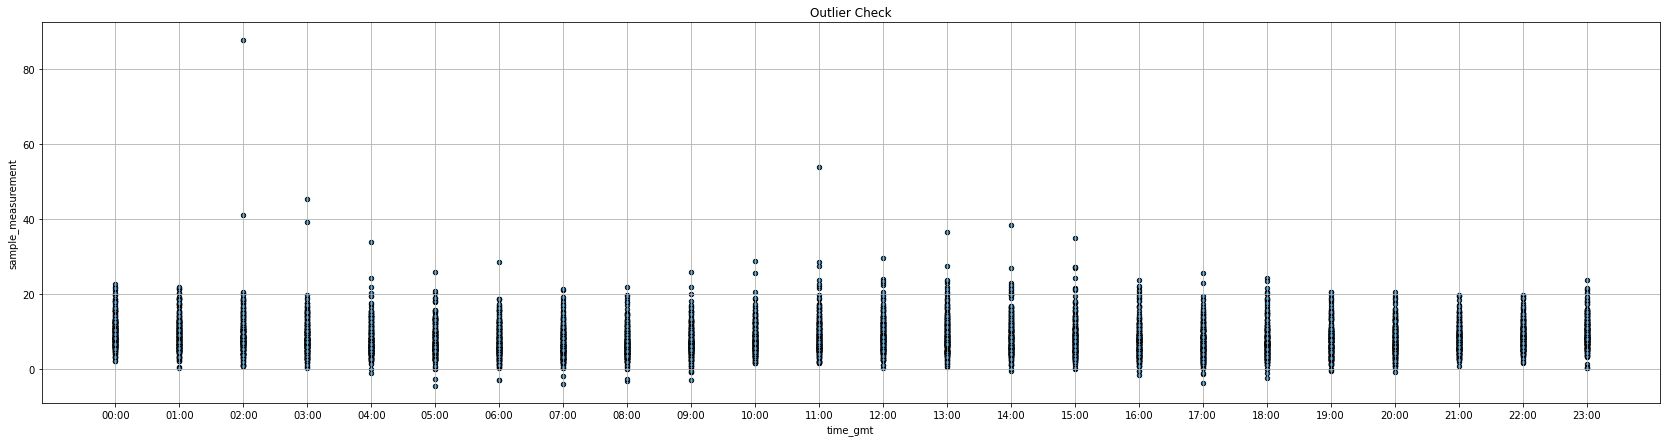

In [88]:
#Use Scatter Plot to visualize outliers.
ny_nyc_filtered_df.sort_values(by='time_gmt', axis=0).plot('time_gmt', 
                    'sample_measurement', 
                    kind='scatter', 
                    grid=True, 
                    title=f'Outlier Check', 
                    edgecolors='black',
                    linewidths=.9,
                    figsize=(29, 7))

plt.show()

In [89]:
# Based off the scatter plot, outliers can be found with a sample data over 400. Show all outliers over 400 sample measurement.
outlier = ny_nyc_filtered_df[(ny_nyc_filtered_df[['sample_measurement']] > 400).all(axis=1)]
outlier

,state_code,state,county_code,county,site_number,parameter,sample_measurement,units_of_measure,latitude,longitude,date_local,time_local,date_gmt,time_gmt,method_type,method_code,method,date_of_last_change,cbsa_code


#### **Continue: Cleaned dataframe being used for analysis**

In [90]:
# Select certain columns to use for mapping, 
ny_nyc_filtered_df=ny_nyc_filtered_df[['county','site_number','sample_measurement','latitude','longitude','time_local','date_gmt','time_gmt','date_of_last_change']]
# Drop nan values and empty values
ny_nyc_filtered_df=ny_nyc_filtered_df.dropna()
# Remove all numbers below 0 and above 400
ny_nyc_filtered_df=ny_nyc_filtered_df[(ny_nyc_filtered_df[['sample_measurement']] > 0).all(axis=1) & (ny_nyc_filtered_df[['sample_measurement']] < 400).all(axis=1)]

ny_nyc_filtered_noIndexChange = ny_nyc_filtered_df

In [91]:
# Assign date_gmt DateTimeIndex. Allows for date searching throug index.
ny_nyc_filtered_df['date_gmt']=pd.DatetimeIndex(ny_nyc_filtered_df['date_gmt'])
#Set index to date_gmt
ny_nyc_filtered_df = ny_nyc_filtered_df.set_index('date_gmt')

In [92]:
# Copy of clean data
ny_nyc_clean_data = ny_nyc_filtered_df.copy()

**Tool**: Search index by date range

In [93]:
# Search index by date range
ny_nyc_clean_data['2019-01-01':'2019-02-02']

,county,site_number,sample_measurement,latitude,longitude,time_local,time_gmt,date_of_last_change
date_gmt,,,,,,,,


In [94]:
# Color thresholds
colors_list = []
for row in ny_nyc_clean_data['sample_measurement']:
    # if more than a value,
    if row > 55.5:
        # Append color value
        colors_list.append('#e80c0c')
    # else, if more than a value,
    elif row > 35.5:
        # Append color value
        colors_list.append('#e8970c')
    elif row > 12.1:
        # Append color value
        colors_list.append('#dbe36b')
    elif row > 0:
        # Append color value
        colors_list.append('#5cb85c')
    else:
        # Append a failing grade
        colors_list.append('Failed')
        #print(f'failed to apply color on row {row}')
        
# Create a column from the list
ny_nyc_clean_data['color'] = colors_list

ny_nyc_clean_data['color'].value_counts()

#5cb85c    4852
#dbe36b    1018
#e8970c       6
#e80c0c       1
Name: color, dtype: int64

------

### **Difference in colors warning & how much time we spend in different air qualities**

#### **Objective**
Use full Sample Dataset. Get percentage of dataset that is in Good, Moderate, Unhealthy and Very Unhealthy for the year.

In [95]:
living_in_air_pollution_percentage = []

In [96]:
living_in_air_pollution_percentage.append(ny_nyc_clean_data['color'].value_counts()[0]/ny_nyc_clean_data['color'].value_counts().sum())
living_in_air_pollution_percentage.append(ny_nyc_clean_data['color'].value_counts()[1]/ny_nyc_clean_data['color'].value_counts().sum())
living_in_air_pollution_percentage.append(ny_nyc_clean_data['color'].value_counts()[2]/ny_nyc_clean_data['color'].value_counts().sum())
living_in_air_pollution_percentage.append(ny_nyc_clean_data['color'].value_counts()[3]/ny_nyc_clean_data['color'].value_counts().sum())


In [97]:
# Round value.
round_value = [round(num, 2) for num in living_in_air_pollution_percentage]
key_list = ['Good (0 - 12.0):', 'Moderate (12.1 - 35.4):', 'Unhealthy (55.5 - 150.4):', 'Very Unhealthy (150.2+):']
#key_list = ['Green:','Yellow:','Orange:','Red:']

# Combine both for loop generated list into one.
percentage_rounded = [dict(zip(key_list, round_value))]
percentage_rounded

[{'Good (0 - 12.0):': 0.83,
  'Moderate (12.1 - 35.4):': 0.17,
  'Unhealthy (55.5 - 150.4):': 0.0,
  'Very Unhealthy (150.2+):': 0.0}]

In [98]:
# Display Percentage Rounded (above) in a DataFrame. Used to plot.
percentage_rounded_df = pd.DataFrame(percentage_rounded)
percentage_rounded_df

,Good (0 - 12.0):,Moderate (12.1 - 35.4):,Unhealthy (55.5 - 150.4):,Very Unhealthy (150.2+):
0,0.83,0.17,0.0,0.0


In [99]:
# Get column names
res_columns=percentage_rounded_df.columns

In [100]:
# Results for plot
results=percentage_rounded_df.iloc[0]

In [101]:
# Group means for plotting red line. Might use. 
group_means=results.mean()

In [102]:
# Function to convert x-label value into percentage. 
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '{:.0%}'.format(x)
    else:
        s = '{:.0%}'.format(x)
    return s
formatter = FuncFormatter(currency)

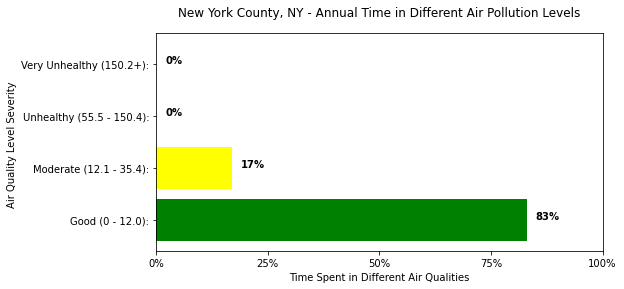

In [103]:
# Plot Percentage of time spent in different air quality.
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(res_columns,results, color=('green','yellow','orange','red'))
labels = ax.get_xticklabels()

plt.setp(labels, 
         horizontalalignment='center')

# Add a vertical line, here we set the style in the function call
#ax.axvline(group_means,ls='--', color='r')

# Text values next to bars
for i, v in enumerate(results):
    ax.text(v + .02, i + .01, ('{:.0%}'.format(v)), color='black', fontweight='bold')

# Move title higher
ax.title.set(y=1.05)

ax.set(xlabel='Time Spent in Different Air Qualities', 
       ylabel='Air Quality Level Severity ',
       title='New York County, NY - Annual Time in Different Air Pollution Levels')
ax.xaxis.set_major_formatter(formatter)

# Set xticks range
ax.set_xticks([0.0, .25, .5, .75, 1.0])
#plt.savefig("./Images/NY_Annual_TimeInPollution_bar.png")
plt.show()

---------

## **Single date - California Air Pollution Data**
Date: 2019-01-01

In [104]:
# Single date - NY Air Pollution Data
single_date_ny_nyc_air = ny_nyc_clean_data.loc['2019-01-01']
#single_date_ca_air
#california_clean_data

In [105]:
range_time = single_date_ny_nyc_air['time_gmt'].sort_values().unique()

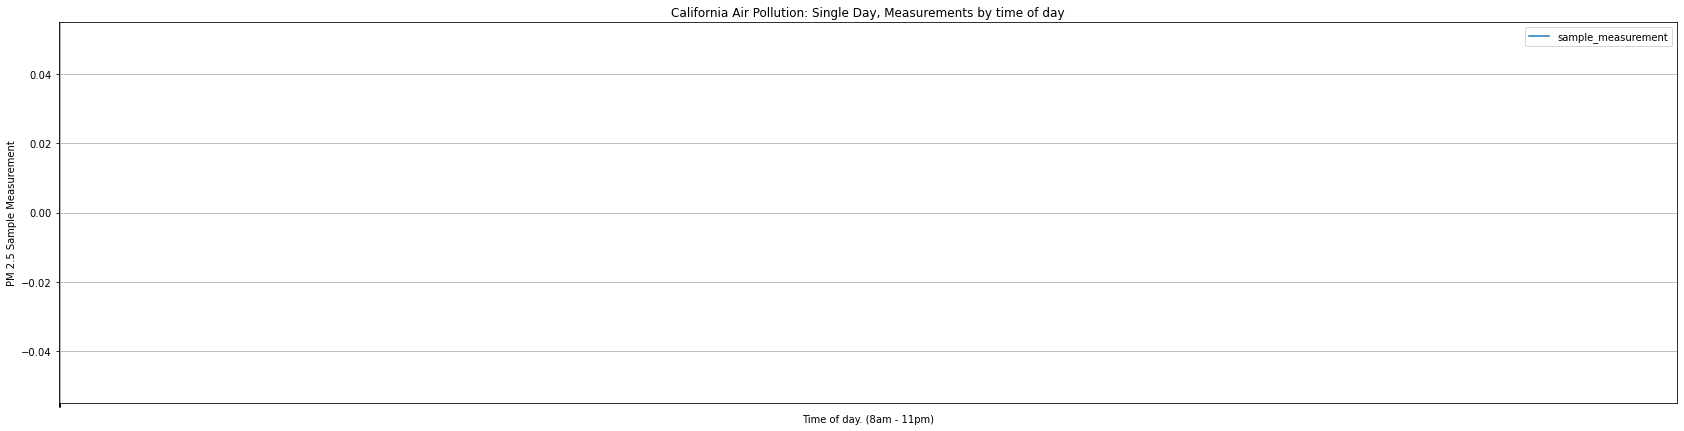

In [106]:
single_date_ny_nyc_air.sort_values(by='time_gmt', axis=0).plot(x='time_gmt', y='sample_measurement', kind='line', figsize=(29, 7),grid=True, title="California Air Pollution: Single Day, Measurements by time of day")
#plt.xticks(np.arange(int(test),int(test2), 3.5))
plt.ylabel('PM 2.5 Sample Measurement')
plt.xlabel('Time of day. (8am - 11pm)')
plt.xlim([0,70])
plt.show()

## **Annual California Air Pollution. Measurement by Day of Year.**
Date Range: 2019-01-01 - 2019-12-02

In [107]:
ny_nyc_clean_data.sort_values(by='time_gmt', axis=0)

,county,site_number,sample_measurement,latitude,longitude,time_local,time_gmt,date_of_last_change,color
date_gmt,,,,,,,,,
2020-02-21,New York,115,6.8,40.84955,-73.935649,19:00,00:00,2020-04-04,#5cb85c
2020-02-05,New York,135,15.5,40.81976,-73.948250,19:00,00:00,2020-04-04,#dbe36b
2020-01-13,New York,134,9.2,40.71436,-73.995180,19:00,00:00,2020-03-04,#5cb85c
2020-02-08,New York,115,10.6,40.84955,-73.935649,19:00,00:00,2020-04-04,#5cb85c
2020-02-06,New York,135,4.8,40.81976,-73.948250,19:00,00:00,2020-04-04,#5cb85c
...,...,...,...,...,...,...,...,...,...
2020-03-07,New York,134,4.8,40.71436,-73.995180,18:00,23:00,2020-05-12,#5cb85c
2020-01-03,New York,115,18.4,40.84955,-73.935649,18:00,23:00,2020-03-04,#dbe36b
2020-03-08,New York,134,10.4,40.71436,-73.995180,18:00,23:00,2020-05-12,#5cb85c


In [108]:
# dataframe to plot
plot_df = ny_nyc_clean_data.copy()
#ax.plot(date, site_number_1103.sample_measurement)
plot_y_information = plot_df.sample_measurement

In [109]:
color_threshold = plot_df.color

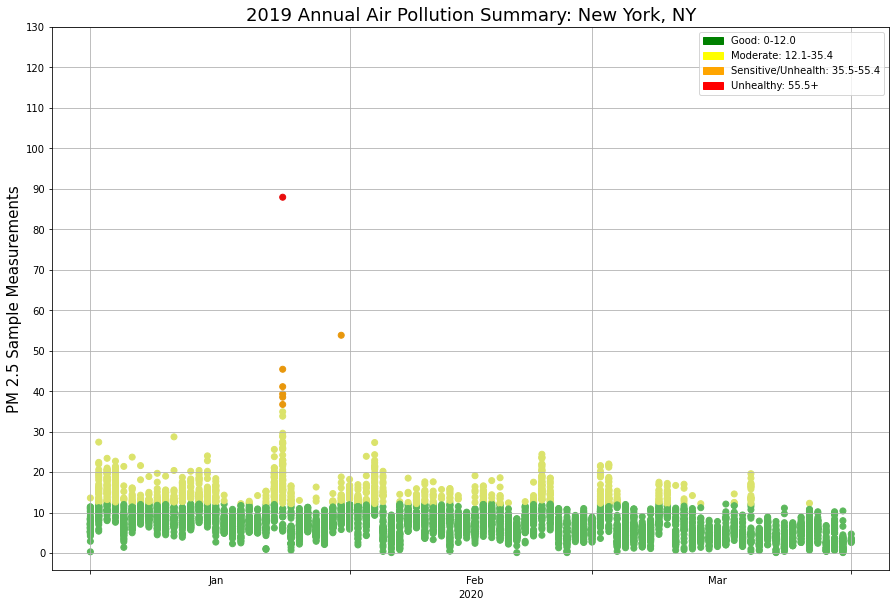

In [110]:
# Assigm date as index of dataframe. Dataframe index has dates
date = plot_df.index.astype('O')

# Data for plt
x = date
y = plot_y_information
c = color_threshold.values


# Plot subplots
fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(x,y, c=c)

# Set month in xaxis by searching date format
ax.xaxis.set_major_locator(dates.MonthLocator())

# 16 is a slight approximation since months differ in number of days.
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# loop for custom tickers. Assign marker size and center text
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

imid = len(plot_df) // 2
ax.set_xlabel(str(date[imid].year))
ax.set_ylabel('PM 2.5 Sample Measurements', size=15)
ax.set_yticks(range(0, 140, 10))
ax.set_title('2019 Annual Air Pollution Summary: New York, NY', size=18)
plt.grid(True)

# Labels for legend
green = mpatches.Patch(color='green', label='Good: 0-12.0')
yellow = mpatches.Patch(color='yellow', label='Moderate: 12.1-35.4')
orange = mpatches.Patch(color='orange', label='Sensitive/Unhealth: 35.5-55.4')
red = mpatches.Patch(color='red', label='Unhealthy: 55.5+')
#Call legend
plt.legend(handles = [green,yellow,orange,red])

# Save an image of the chart and print it to the screen
#plt.savefig("./Images/NY_Annual_pm25_scatter.png")
plt.show()

### **Begin IQR research - Annual Sample Results**

In [111]:
# Copy of clean data
ny_nyc_box_data = ny_nyc_filtered_noIndexChange
# Sort Values
ny_nyc_box_data=ny_nyc_box_data.sort_values(["date_gmt", "time_gmt"])

In [112]:
# Set index to site_number. Sort values by site_number and time_gmt
ny_nyc_box_data.sort_values(by=['site_number','time_gmt'], ascending=True)

,county,site_number,sample_measurement,latitude,longitude,time_local,date_gmt,time_gmt,date_of_last_change
19,New York,115,10.9,40.84955,-73.935649,19:00,2020-01-02,00:00,2020-03-04
43,New York,115,12.6,40.84955,-73.935649,19:00,2020-01-03,00:00,2020-03-04
67,New York,115,20.2,40.84955,-73.935649,19:00,2020-01-04,00:00,2020-03-04
91,New York,115,7.0,40.84955,-73.935649,19:00,2020-01-05,00:00,2020-03-04
115,New York,115,9.9,40.84955,-73.935649,19:00,2020-01-06,00:00,2020-03-04
...,...,...,...,...,...,...,...,...,...
5905,New York,135,3.5,40.81976,-73.948250,18:00,2020-03-27,23:00,2020-05-12
5929,New York,135,7.3,40.81976,-73.948250,18:00,2020-03-28,23:00,2020-05-12
5953,New York,135,0.6,40.81976,-73.948250,18:00,2020-03-29,23:00,2020-05-12
5977,New York,135,6.4,40.81976,-73.948250,18:00,2020-03-30,23:00,2020-05-12


In [113]:
# Filter DF to only columns used
filtered_ny_nyc_box_data = ny_nyc_box_data[['sample_measurement', 'site_number','time_gmt']].set_index('site_number').sort_values(by=['site_number','time_gmt'], ascending=True)

In [114]:
# Make a list of site_numbers. Used in for loops to grab specific data by site number & used for new df header.
filtered_ny_nyc_box_list = filtered_ny_nyc_box_data.index.unique().tolist()

In [115]:
# Look through sample measurement list and count the amount of mice in each drug regimen.
# Create an empty list to fill with for loop
measurement_quartile=[]

# Search through filtered_ca_la_box_data with '.loc[site_number, 'sample_measurement' column]' and get the quartile
for i in filtered_ny_nyc_box_list:
    location = filtered_ny_nyc_box_data.loc[i, 'sample_measurement'].quantile(q=[.25, .5, .75])
    # append results to measurement_quartile list before moving to next value in tumor_regimen_list
    measurement_quartile.append(location)

In [116]:
measurement_quartile

[0.25     5.6
 0.50     8.2
 0.75    11.3
 Name: sample_measurement, dtype: float64,
 0.25     5.9
 0.50     8.0
 0.75    10.8
 Name: sample_measurement, dtype: float64,
 0.25    5.0
 0.50    7.1
 0.75    9.9
 Name: sample_measurement, dtype: float64]

In [117]:
iqr_all = []

# loop through measurement_quartile range (0-10). Find IQR by selecting one value at a time in the measurement_quartile list. 
for i in range(len(measurement_quartile)):
    iqr = (measurement_quartile[i][0.75])-(measurement_quartile[i][0.25])
    # Append finding to iqr_all list before moving to next value
    iqr_all.append(iqr)
#print(iqr_all)

In [118]:
# Show list. Verify we have correct amount
iqr_all

[5.700000000000001, 4.9, 4.9]

In [119]:
assert len(iqr_all) == 3

In [120]:
headers_list=['Hudson Heights, NY (115)','Lower Manhattan, NY (134)','West harlem, NY (135)']

In [121]:
# Round value.
round_iqr_all = [round(num, 2) for num in iqr_all]

# Combine both for loop generated list into one.
measurements_iqr_all = [dict(zip(headers_list, round_iqr_all))]
measurements_iqr_all

[{'Hudson Heights, NY (115)': 5.7,
  'Lower Manhattan, NY (134)': 4.9,
  'West harlem, NY (135)': 4.9}]

In [122]:
# Display in dataframe
measurements_iqr_all_df=pd.DataFrame(measurements_iqr_all)
measurements_iqr_all_df

,"Hudson Heights, NY (115)","Lower Manhattan, NY (134)","West harlem, NY (135)"
0,5.7,4.9,4.9


### Begin Box Plots - Annual Sample Results

In [123]:
# Values for plotting
box_plot_values = round_iqr_all
# Sort to determine outliers
values_sorted = sorted(box_plot_values)
print(values_sorted)

[4.9, 4.9, 5.7]


In [124]:
# Reset dataframe for filtering
filtered_ny_nyc_box_data=filtered_ny_nyc_box_data.reset_index()

In [125]:
#Filter: By site location number. Set as own dataframe
ny_nyc_box_115=filtered_ny_nyc_box_data[filtered_ny_nyc_box_data['site_number'] == 115]
# ny_nyc_box_128=filtered_ny_nyc_box_data[filtered_ny_nyc_box_data['site_number'] == 128]
ny_nyc_box_134=filtered_ny_nyc_box_data[filtered_ny_nyc_box_data['site_number'] == 134]
ny_nyc_box_135=filtered_ny_nyc_box_data[filtered_ny_nyc_box_data['site_number'] == 135]


In [126]:
# Sample measurement values per site location
site_115_measurements = ny_nyc_box_115['sample_measurement']
# site_128_measurements = ny_nyc_box_128['sample_measurement']
site_134_measurements = ny_nyc_box_134['sample_measurement']
site_135_measurements = ny_nyc_box_135['sample_measurement']

total = len(site_115_measurements)+len(site_128_measurements)+len(site_134_measurements)+len(site_135_measurements)

Total Samples Measured: 5877


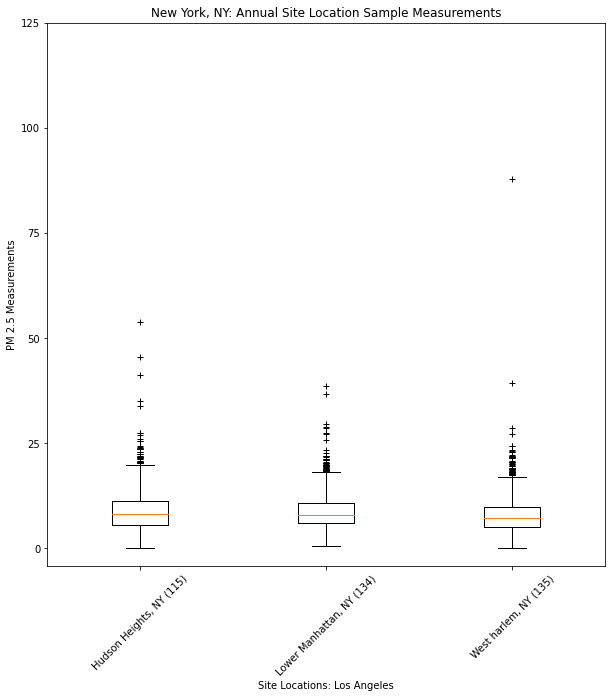

In [127]:
# Generate a box plot of the sample measurement of each site location, annually
measurement_plot_info = [site_115_measurements,site_134_measurements,site_135_measurements]


fig, ax = plt.subplots(figsize=(10, 10))
pos = np.array(range(len(measurement_plot_info))) + 1
bp = ax.boxplot(measurement_plot_info, sym='k+', showfliers=True)

ax.set_xticklabels(headers_list, rotation=45)
ax.set_yticks(range(0, 150, 25))
ax.set_xlabel('Site Locations: Los Angeles')
ax.set_ylabel('PM 2.5 Measurements')
ax.set_title('New York, NY: Annual Site Location Sample Measurements')

#plt.savefig("./Images/NY_Annual_pm25_boxplot.png")
print(f'Total Samples Measured: {total}')
plt.show()

Potential Outliers

Filtering by outlier values and dates may tell us which day/month of the year has larger than normal air pollution measurements. 

In [128]:
# Hudson Heights, NY (115) Outliers
hh_outliers = bp["fliers"][2].get_data()[1]
hh_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(site_115_measurements)}')
print(f'Total amount of outliers: {len(hh_outliers)}')
print(f'Hudson Heights Outlier values: {hh_outliers}')

Total amount samples in set: 2129
Total amount of outliers: 65
Hudson Heights Outlier values: [17.3 17.3 17.5 17.5 17.5 17.6 17.6 17.6 17.7 17.7 17.8 17.9 17.9 18.
 18.  18.  18.1 18.1 18.2 18.2 18.3 18.4 18.6 18.7 18.8 18.8 18.8 18.9
 18.9 19.  19.  19.1 19.1 19.1 19.5 19.5 19.7 20.  20.1 20.2 20.4 20.4
 20.5 20.6 20.6 20.7 21.4 21.4 21.4 21.6 21.6 21.6 21.9 22.  22.1 22.9
 22.9 23.  23.4 24.2 24.4 27.2 28.7 39.3 87.9]


In [129]:
# East Village, NY (128) Outliers
# ev_outliers = bp["fliers"][3].get_data()[1]
# ev_outliers.sort(axis=-1, kind='quicksort', order=None)
# print(f'Total amount samples in set: {len(site_128_measurements)}')
# print(f'Total amount of outliers: {len(ev_outliers)}')
# print(f'East Village Outlier values: {ev_outliers}')

In [130]:
# Lower Manhattan, NY (134) Outliers
lm_outliers = bp["fliers"][1].get_data()[1]
lm_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(site_134_measurements)}')
print(f'Total amount of outliers: {len(lm_outliers)}')
print(f'Lower Manhattan Outlier values: {lm_outliers}')

Total amount samples in set: 1631
Total amount of outliers: 58
Lower Manhattan Outlier values: [18.2 18.3 18.4 18.4 18.4 18.5 18.5 18.6 18.6 18.6 18.7 18.7 18.7 18.7
 18.8 18.8 18.8 19.  19.1 19.1 19.2 19.4 19.5 19.5 19.6 19.7 19.7 19.7
 19.8 19.8 19.8 19.9 20.  20.2 20.2 20.2 20.3 20.6 21.  21.  21.1 21.1
 21.2 21.3 21.7 22.  22.  22.  22.7 23.4 25.8 27.1 27.3 28.7 28.9 29.6
 36.7 38.5]


In [131]:
# West harlem, NY (135) Outliers
westharlem_outliers = bp["fliers"][0].get_data()[1]
westharlem_outliers.sort(axis=-1, kind='quicksort', order=None)
print(f'Total amount samples in set: {len(site_135_measurements)}')
print(f'Total amount of outliers: {len(westharlem_outliers)}')
print(f'West harlem Outlier values: {westharlem_outliers}')

Total amount samples in set: 2117
Total amount of outliers: 43
West harlem Outlier values: [19.9 20.2 20.2 20.2 20.2 20.5 20.5 20.6 20.6 20.7 20.8 21.1 21.3 21.4
 21.5 21.6 21.7 21.8 22.  22.  22.3 22.4 22.4 22.8 22.9 23.6 23.7 23.7
 23.8 23.9 24.  24.3 25.6 25.6 26.  27.  27.4 27.5 33.8 34.9 41.1 45.4
 53.8]


## **Measurements by time of day**

Single Day

In [132]:
range_time = single_date_ny_nyc_air['time_gmt'].sort_values().unique()
range_time

array([], dtype=object)

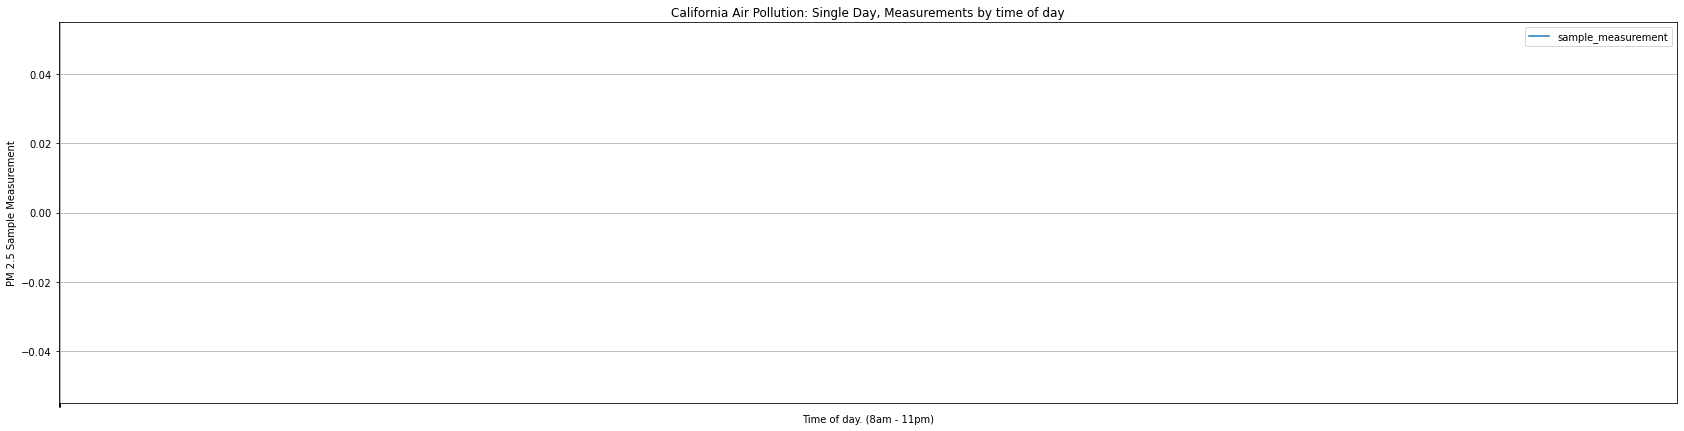

In [133]:
single_date_ny_nyc_air.sort_values(by='time_gmt', axis=0).plot(x='time_gmt', y='sample_measurement', kind='line', figsize=(29, 7),grid=True, title="California Air Pollution: Single Day, Measurements by time of day")
#plt.xticks(np.arange(int(test),int(test2), 3.5))
plt.ylabel('PM 2.5 Sample Measurement')
plt.xlabel('Time of day. (8am - 11pm)')
plt.xlim([0,70])
plt.show()

### Every day of the year by Time of day

In [134]:
# dataframe to plot
plot_df = ny_nyc_clean_data.copy()
plot_df=plot_df.sort_values('time_gmt')
#ax.plot(date, site_number_1103.sample_measurement)
plot_y_information = plot_df.sample_measurement

In [135]:
color_threshold = plot_df.color

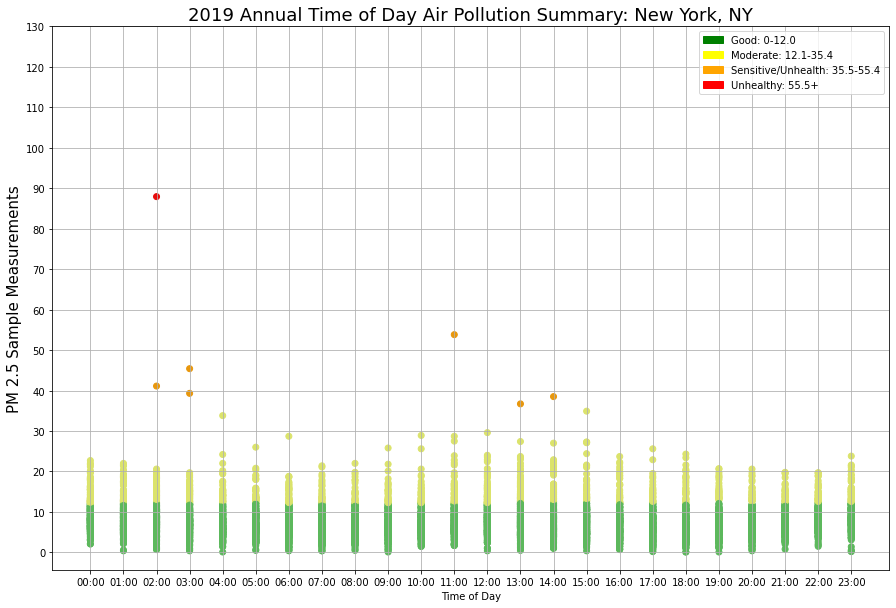

In [136]:
# Assigm date as index of dataframe. Dataframe index has dates
date = plot_df.time_gmt.astype('O')

# Data for plt
x = date
y = plot_y_information
c = color_threshold.values

# Plot subplots
fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(x,y, c=c)

imid = len(plot_df) // 2
ax.set_xlabel('Time of Day')
ax.set_ylabel('PM 2.5 Sample Measurements', size=15)
ax.set_yticks(range(0, 140, 10))
ax.set_title('2019 Annual Time of Day Air Pollution Summary: New York, NY', size=18)
plt.grid(True)

# Labels for legend
green = mpatches.Patch(color='green', label='Good: 0-12.0')
yellow = mpatches.Patch(color='yellow', label='Moderate: 12.1-35.4')
orange = mpatches.Patch(color='orange', label='Sensitive/Unhealth: 35.5-55.4')
red = mpatches.Patch(color='red', label='Unhealthy: 55.5+')
#Call legend
plt.legend(handles = [green,yellow,orange,red])

# Save an image of the chart and print it to the screen
#plt.savefig("./Images/NY_Annual_TimeofDay_pm25_scatter.png")
plt.show()